- Données relatives à l'activité partielle dans le cadre de l'épidémie de COVID-19 en France
<https://public.opendatasoft.com/explore/dataset/donnees-relatives-activite-partielle-covid-19-france/table/?dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiU1VNIiwieUF4aXMiOiJyZXF1ZXN0X2tjb3VudCIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6IiNGRjUxNUEifV0sInhBeGlzIjoibmFjZV9uYW1lIiwibWF4cG9pbnRzIjo1MCwic29ydCI6InNlcmllMS0xIiwiY29uZmlnIjp7ImRhdGFzZXQiOiJkb25uZWVzLXJlbGF0aXZlcy1hY3Rpdml0ZS1wYXJ0aWVsbGUtY292aWQtMTktZnJhbmNlIiwib3B0aW9ucyI6e319fV0sInRpbWVzY2FsZSI6IiIsImRpc3BsYXlMZWdlbmQiOnRydWUsImFsaWduTW9udGgiOnRydWV9>

In [1]:
import pandas as pd
import numpy as np
import geopandas

import matplotlib.pyplot as plt

## Importing data

In [2]:
activite_partielle_df = pd.read_csv('donnees-relatives-activite-partielle-covid-19-france.csv', sep=';')
dept_geo = geopandas.read_file('departements.geojson', driver='GeoJSON')

In [3]:
activite_partielle_df.head(3)

,Dispositif,Nombre de demandes déposées,Nombre de salariés concernés,Nombre d'heures demandées,Nombre d'établissements concernés,Code Officiel Région,Nom Région,Code Officiel Département,Nom Département,Code Section NACE17,Nom Section NACE17,date_maj,Geo Point,Code ISO 3166 Zone,Nombre de salariés concernés en M,Nombre de demandes déposées en milliers,Nombre d'heures demandées en M,Nombre d'établissements concernés en milliers
0,Activite Partielle,85.0,330.0,106590.0,80.0,84.0,Auvergne-Rhône-Alpes,07,Ardèche,AZ,"Agriculture, sylviculture et pêche",2020-07-21,"44.752802029,4.42552170882",FXX,0.000330,0.085,0.106590,0.080
1,Activite Partielle,25.0,3765.0,1993420.0,25.0,84.0,Auvergne-Rhône-Alpes,07,Ardèche,C4,Fabrication de matériels de transport,2020-07-21,"44.752802029,4.42552170882",FXX,0.003765,0.025,1.993420,0.025
2,Activite Partielle,575.0,4980.0,1512015.0,515.0,84.0,Auvergne-Rhône-Alpes,07,Ardèche,MN,Act. scientif. et tech. ; services admin. et d...,2020-07-21,"44.752802029,4.42552170882",FXX,0.004980,0.575,1.512015,0.515


In [4]:
dept_geo.head(3)

,code,nom,geometry
0,01,Ain,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ..."
1,02,Aisne,"POLYGON ((3.17296 50.01131, 3.17382 50.01186, ..."
2,03,Allier,"POLYGON ((3.03207 46.79491, 3.03424 46.7908, 3..."


In [5]:
activite_partielle_df[['Code Section NACE17', 'Nom Section NACE17']].drop_duplicates()

,Code Section NACE17,Nom Section NACE17
0,AZ,"Agriculture, sylviculture et pêche"
1,C4,Fabrication de matériels de transport
2,MN,Act. scientif. et tech. ; services admin. et d...
3,DE,Industries extractives
5,OQ,"Admin. publique - enseignement, santé humaine ..."
6,IZ,Hébergement et restauration
7,RU,Autres activités de services
10,C5,Fabrication d'autres produits indus.
17,KZ,Act. financières et d'assurance
19,HZ,Transports et entreposage


## Analysis

In [6]:
quantitative_vars = ['Nombre de salariés concernés en M',
                     'Nombre de demandes déposées en milliers',
                     'Nombre d\'heures demandées en M',
                     'Nombre d\'établissements concernés en milliers']

### Cumul per section

In [7]:
cumul_section = activite_partielle_df.groupby(['Code Section NACE17'])[quantitative_vars].sum().reset_index()

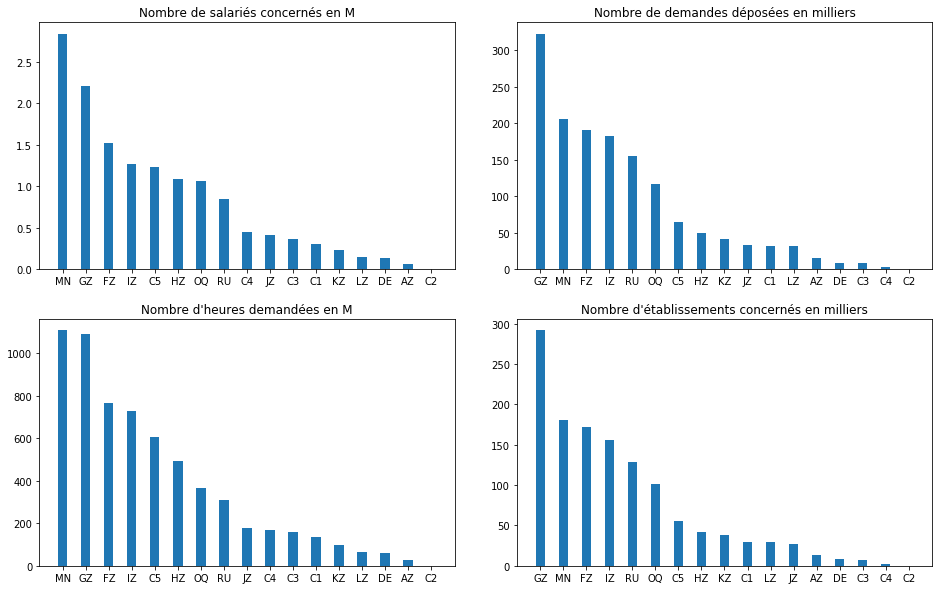

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
width = 0.4

ax[0, 0].set_title('Nombre de salariés concernés en M')
rects00 = ax[0, 0].bar(
    cumul_section.sort_values('Nombre de salariés concernés en M', ascending=False)['Code Section NACE17'],
    cumul_section.sort_values('Nombre de salariés concernés en M', ascending=False)['Nombre de salariés concernés en M'],
    width)

ax[0, 1].set_title('Nombre de demandes déposées en milliers')
rects01 = ax[0, 1].bar(
    cumul_section.sort_values('Nombre de demandes déposées en milliers', ascending=False)['Code Section NACE17'],
    cumul_section.sort_values('Nombre de demandes déposées en milliers', ascending=False)['Nombre de demandes déposées en milliers'],
    width)

ax[1, 0].set_title('Nombre d\'heures demandées en M')
rects10 = ax[1, 0].bar(
    cumul_section.sort_values('Nombre d\'heures demandées en M', ascending=False)['Code Section NACE17'],
    cumul_section.sort_values('Nombre d\'heures demandées en M', ascending=False)['Nombre d\'heures demandées en M'],
    width)

ax[1, 1].set_title('Nombre d\'établissements concernés en milliers')
rects11 = ax[1, 1].bar(
    cumul_section.sort_values('Nombre d\'établissements concernés en milliers', ascending=False)['Code Section NACE17'],
    cumul_section.sort_values('Nombre d\'établissements concernés en milliers', ascending=False)['Nombre d\'établissements concernés en milliers'],
    width)

plt.subplots_adjust(wspace=0.15)
plt.show()


The most impacted sections are commerce, administration services, construction and accommodation & restaurant. These sections need lots of contacts among people, so they have to suspend their working; especially commerce, nearly 1.1 billion hours and around 300 thousand commercial organisations are impacted.

On the other hand, among all impacted sections some are not that impacted by COVID, such as coking & refining, agriculture, forestry & fishing, machine manufacturing and extractive industries. Working in these sections do not need the contact various people, so they are not that impacted.

### Cumul per région

In [9]:
cumul_region = activite_partielle_df.groupby(['Nom Région'])[quantitative_vars].sum().reset_index()

In [10]:
cumul_region.head()

,Nom Région,Nombre de salariés concernés en M,Nombre de demandes déposées en milliers,Nombre d'heures demandées en M,Nombre d'établissements concernés en milliers
0,Auvergne-Rhône-Alpes,1.759895,185.245,742.179960,164.600
1,Bourgogne-Franche-Comté,0.549350,54.110,223.718180,47.745
2,Bretagne,0.618880,67.710,276.708005,61.115
3,Centre-Val de Loire,0.457215,47.420,189.495665,42.320
4,Corse,0.062595,10.715,35.853435,10.235


In [11]:
type(list(cumul_region.sort_values('Nombre de salariés concernés en M')['Nom Région']))

list

In [12]:
np.arange(len(cumul_region['Nom Région']))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

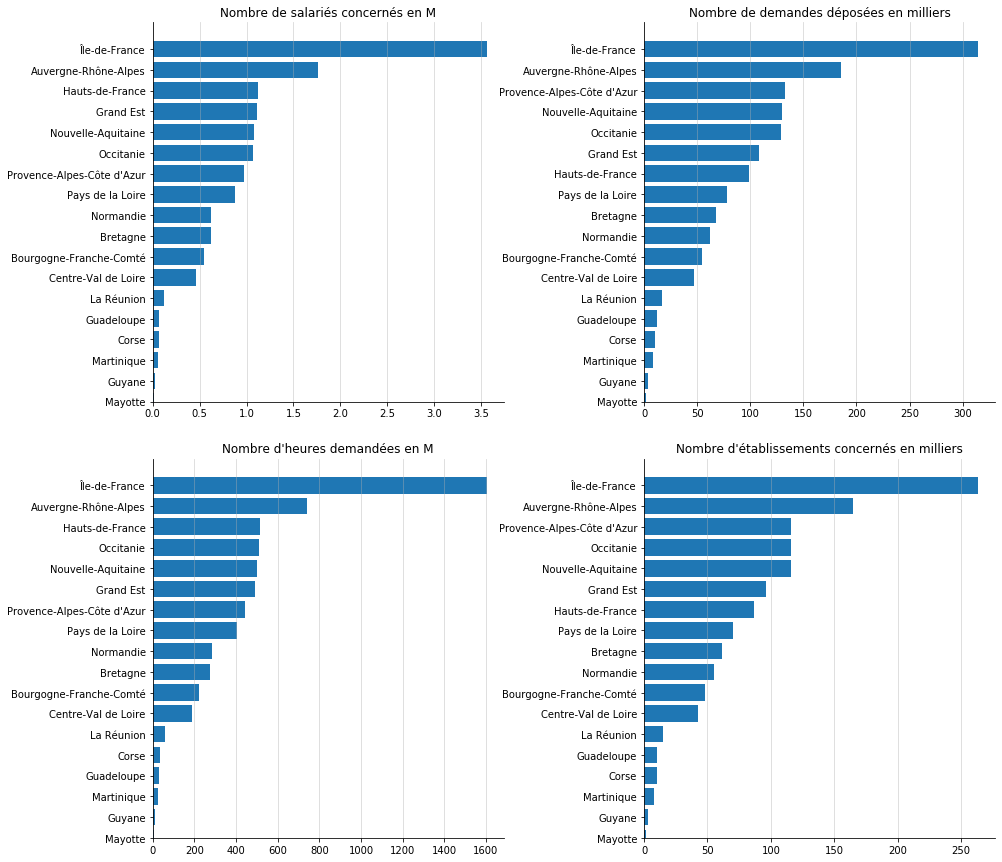

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(13, 15))
width = 0.4

ax[0, 0].set_title('Nombre de salariés concernés en M')
ax[0, 0].barh(np.arange(len(cumul_region['Nom Région'])),
              cumul_region.sort_values('Nombre de salariés concernés en M')['Nombre de salariés concernés en M'],
              align='center')
ax[0, 0].set_ylim(0)
ax[0, 0].set_yticks(np.arange(len(cumul_region['Nom Région'])))
ax[0, 0].set_yticklabels(list(cumul_region.sort_values('Nombre de salariés concernés en M')['Nom Région']))
ax[0, 0].grid(axis='x', alpha=0.5)

ax[0, 1].set_title('Nombre de demandes déposées en milliers')
ax[0, 1].barh(np.arange(len(cumul_region['Nom Région'])),
              cumul_region.sort_values('Nombre de demandes déposées en milliers')['Nombre de demandes déposées en milliers'],
              align='center')
ax[0, 1].set_ylim(0)
ax[0, 1].set_yticks(np.arange(len(cumul_region['Nom Région'])))
ax[0, 1].set_yticklabels(list(cumul_region.sort_values('Nombre de demandes déposées en milliers')['Nom Région']))
ax[0, 1].grid(axis='x', alpha=0.5)

ax[1, 0].set_title('Nombre d\'heures demandées en M')
ax[1, 0].barh(np.arange(len(cumul_region['Nom Région'])),
              cumul_region.sort_values('Nombre d\'heures demandées en M')['Nombre d\'heures demandées en M'],
              align='center')
ax[1, 0].set_ylim(0)
ax[1, 0].set_yticks(np.arange(len(cumul_region['Nom Région'])))
ax[1, 0].set_yticklabels(list(cumul_region.sort_values('Nombre d\'heures demandées en M')['Nom Région']))
ax[1, 0].grid(axis='x', alpha=0.5)

ax[1, 1].set_title('Nombre d\'établissements concernés en milliers')
ax[1, 1].barh(np.arange(len(cumul_region['Nom Région'])),
              cumul_region.sort_values('Nombre d\'établissements concernés en milliers')['Nombre d\'établissements concernés en milliers'],
              align='center')
ax[1, 1].set_ylim(0)
ax[1, 1].set_yticks(np.arange(len(cumul_region['Nom Région'])))
ax[1, 1].set_yticklabels(list(cumul_region.sort_values('Nombre d\'établissements concernés en milliers')['Nom Région']))
ax[1, 1].grid(axis='x', alpha=0.5)

ax[0, 0].spines['top'].set_visible(False)
ax[0, 0].spines['right'].set_visible(False)
ax[0, 1].spines['top'].set_visible(False)
ax[0, 1].spines['right'].set_visible(False)
ax[1, 0].spines['top'].set_visible(False)
ax[1, 0].spines['right'].set_visible(False)
ax[1, 1].spines['top'].set_visible(False)
ax[1, 1].spines['right'].set_visible(False)

plt.subplots_adjust(hspace=0.15, wspace=0.4, left=0.05, right=0.95)
plt.show()


Among all French regions, Ile-de-France is the most impacted one, that might because of the reduction of tourists since COVID-19 pandemic which impacted lots of on restaurants, hotels and other tourism-related business; moreover, the commercial business is much more in Ile-de-France than in other regions, so that there are more people are impacted. Similar reasons for Auvergne-Rhône-Alpes.

### Map: cumul per department

### Time series: total / per section / per région